<b>Numerical Analysis notebook<b>

This is a notebook dedicated to the course Numerical Analysis.The main scope would be to implement the algorithms ,taught during the semester, in Python


Finding roots to non linear equations


In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from sympy import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp



The solution is in the interval [ -0.5 , 49.75 ] with an error less than: 2512.5 %
The solution is in the interval [ -0.5 , 24.625 ] with an error less than: 1256.25 %
The solution is in the interval [ -0.5 , 12.0625 ] with an error less than: 628.125 %
The solution is in the interval [ -0.5 , 5.78125 ] with an error less than: 314.0625 %
The solution is in the interval [ 2.640625 , 5.78125 ] with an error less than: 157.03125 %
The solution is in the interval [ 2.640625 , 4.2109375 ] with an error less than: 78.515625 %
The solution is in the interval [ 2.640625 , 3.42578125 ] with an error less than: 39.2578125 %
The solution is in the interval [ 2.640625 , 3.033203125 ] with an error less than: 19.62890625 %
The solution is in the interval [ 2.8369140625 , 3.033203125 ] with an error less than: 9.814453125 %
The solution is in the interval [ 2.93505859375 , 3.033203125 ] with an error less than: 4.9072265625 %
The solution is in the interval [ 2.984130859375 , 3.033203125 ] with an 

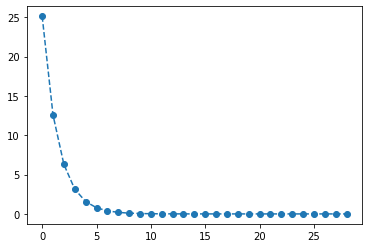

In [2]:
#Method 1 (Dixotomisi)

def f(x):
    return np.exp(x)/(x+1)-5 #Define your function here. This function has the obvious solution x=1

def corrange(a,b): #This line of code makes sure that when we input the range a and b , we always get the correct sequence
    if(a<=b):
        return a,b
    return b,a

def sol(a,b): #This line of code returns the new range at which our solution lies
    a,b = corrange(a,b)
    m = (a+b)/2
    if (f(a)*f(b) == 0):
        return a,b
    elif (f(a)*f(m) < 0):
        return a,m
    return m,b

def error(a,b):
    return abs((a-b))/2
#Lets run that a few times to get our solution
#Starting values
a=-0.5
b=100
#The number of iteration for the algorithm 
accuracy = 30
store = []
for i in range(1,accuracy,1):
    a,b = sol(a,b)
    print("The solution is in the interval [" ,a ,",",b,"] with an error less than:",error(a,b)*100,"%")
    store.append(error(a,b))
#The true root according to desmos is 2.994 , so not that bad 
plt.plot(store,'o--')
plt.show()
#We can see that the error has the exponential decay that we expected




In [3]:
#Method 2 (Grammikhs paremvolhs)

#we need a guess for the root in the range [x0,x1] with f(x1)f(x2)<0
x0 = 1
x1 = 10
#We shall make the function recursive 

def calc(x,y):
    x,y = corrange(x,y)
    return (y-f(y)/(f(y)-f(x))*(y-x))



def gpsol(n): #Its written in a way that x2 = gpsol(2)=calc(x1,x0)
    if(n == 1):
        return x1
    elif(n == 0 ):
        return x0
    else:
        return calc(gpsol(n-1),gpsol(n-2))

gpsol(19)
#Its limit is 19 iterations

13.9333594369980
12.8616603657550
11.7841037964898
10.6997724564499
9.60775496635929
8.50760788001345
7.40079351117952
6.29479401736072
5.21395515215977
4.22360276414275
3.45992380654112
3.07440920053261
2.99692532201390
2.99431119830769
2.99430834700551
2.99430834700212
2.99430834700212


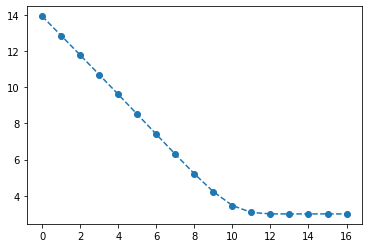

In [4]:
#Method 3 (Newton-Raphson)
k = symbols('k')
f = exp(k)/(k+1)-5
fprime = diff(f,k)
guess = 15
#Thats an easy recursive function
#Note to self , never call something easy because thats the fastest way for the code to not work
list = []

def help(n):
    return (f.subs(k,n).evalf())/(fprime.subs(k,n).evalf())

def lin(x):
    return x-help(x)

def nrsol(n):
    if(n == 1):
        #print("finish")
        return lin(guess)
    else:  
        #print(n)
        return lin(nrsol(n-1))

for i in range(1,18,1):
    list.append(nrsol(i))
    print(nrsol(i))
    
plt.plot(list , 'o--')
plt.show()

Finding solutions to linear systems of equations


In [71]:
#Some introductory functions to make everything prettier.We deal only with 
#Remember matrices start counting from 0

def visualize(A):
    for i in range(0,len(A),1):
        for j in range(0,len(A[0]),1):
            print(A[i][j], "   " ,end = '')
        print('')
    print("")   
    return 0
#for example
A = [[1,3,5,3],[3,5,3,2,],[1,2,4,1],[1,4,3,2]]
visualize(A)

#A function to add the rows on a matrix

def rowadd(A, I , J , a  ):
    for i in range(0,len(A[0]),1):
        A[J][i] = A[J][i]+a*A[I][i]
    return A
#These variables represent the matrix we want to change , I and J is the index of the rows , and a is a scalar quantity by which we multiply the first row


def coladd(A, I , J , a  ):
    for i in range(0,len(A),1):
        A[i][J] = A[i][J]+a*A[i][I]
    return A

def normalize(A):
    for i in range(0,len(A),1):
        norm = A[i][i]
        for j in range(0,len(A[0]),1):
            A[i][j] = A[i][j]/norm
#This function renders the diagonals of a matrix 1, by scaling all the rows appropriately


def plug(A,B):
    n = len(A)
    m = n+1
    arr = np.ones((n, m))
    for i in range(0,n,1):
        for j in range(0,n,1):
            arr[i][j] = A[i][j]
    for k in range(0,n,1):
        arr[k][n] = B[k]
    return arr
#This function takes an nxn matrix and adds a n+1 column that has the elements of a vertical vector b (np.array)

#This function does the exact opposite job of the last one
def deplug(A):
    n = len(A)
    m = n+1
    arrA = np.ones((n, n))
    arrB = np.ones((n,1))
    for i in range(0,n,1):
        for j in range(0,n,1):
            arrA[i][j] = A[i][j]
    for k in range(0,n,1):
        arrB[k] = A[k][n]
    return arrA,arrB

rowadd(A,0,1,-3) 
visualize(A)
print(A)

1    3    5    3    
3    5    3    2    
1    2    4    1    
1    4    3    2    

1    3    5    3    
0    -4    -12    -7    
1    2    4    1    
1    4    3    2    

[[1, 3, 5, 3], [0, -4, -12, -7], [1, 2, 4, 1], [1, 4, 3, 2]]


In [78]:
#Method (Gauss elimination)
A = [[1,1,1],[0,1,1],[0,0,1]] #The matrix of the system
b = np.array([[1],[1],[1]]) #The vector of the constant coefficients
#Its important that u define it as np.array() eitherwise python gets a bit cranky and doesnt cooperate
def Gausselim(A,b):
    A = plug(A,b)
    for index in range(0,len(A)-1,1):
        for k in range(1,len(A)-index,1):
            rowadd(A, index, index + k, -A[index+k][index]/A[index][index]) 
    normalize(A)       
    return deplug(A)  
#The function return a tuple containing both the upper triangular matrix , and the vertical vector that contains the constant 
#values of the system of equations.
#We now enter the second phase of gauss elimination. Having obtained the proper matrices , we must now solve for the values of the
#unknown variables

#I choose to run the array backwards , because we start at the very bottom.
def Gaussclear(matr , vec):
    sol = np.ones((len(vec),1))
    l = len(vec)
    psum = 0
    sol[l-1] = (vec[l-1])/(matr[l-1][l-1])
    for index in range(l-2,-1,-1):
        para = matr[index][index]
        for j in range(index +1 , l ,1):
                psum =psum + matr[index][j]*sol[j]
                print(index , j)
        sol[index] = (vec[index] -psum)/(para)
        print(sol[index])
  
    print(matr)
    print(sol)
    print(vec)
    return sol

#We could easily merge the two blocks of code together.

def Gausssol(A,b):
    matr = Gausselim(A,b)[0] 
    vec  = Gausselim(A,b)[1]
    return Gaussclear(matr,vec)


#There is an error with the code. i will come back to it later. It doesnt produce the correct solutions fot the first index
p = [[1,2,3],[-2,3,-7],[4,-1,9]]
q = np.array([[5],[9],[12]])
Gaussclear(Gausselim(p,q)[0],Gausselim(p,q)[1])



1 2
[2.16666667]
0 1
0 2
[11.61904762]
[[ 1.          2.          3.        ]
 [ 0.          1.         -0.14285714]
 [-0.         -0.          1.        ]]
[[11.61904762]
 [ 2.16666667]
 [-3.83333333]]
[[ 5.        ]
 [ 2.71428571]
 [-3.83333333]]


array([[11.61904762],
       [ 2.16666667],
       [-3.83333333]])

In [67]:
#Method Gauss-Jordan Elimination
A =  [[1,2,1,5,6]
     ,[3,1,1,6,2]
     ,[1,0,1,5,2]
     ,[1,3,5,2,5]
     ,[7,4,2,5,3]]
b = np.array([[3],[4],[3],[9],[1]])

p = [[1,2,3],[-2,3,-7],[4,-1,9]]
q = np.array([[5],[9],[12]])


C = plug(Gausselim(p,q)[0],Gausselim(p,q)[1])
length = len(C)

#Again i will run the matrix from the bottom. We try to make the matrix and upper rectangular. 
#Thus the diagonals will equal the appropriate values for our solutions
for k in range(length - 1,-1,-1):
    param = C[k][k]
    for j in range(k-1 , -1,-1):
        elimfactor = -C[j][k]/param
        rowadd(C , k , j, elimfactor)

print("Results")
visualize(C)
#p = [[1,2,3],[-2,3,-7],[4,-1,9]]
#q = np.array([[5],[9],[12]])
#visualize(Gausssol(p,q))




Results
1.0    0.0    0.0    -86.9795918367347    
0.0    1.0    0.0    21.346938775510203    
-0.0    -0.0    1.0    16.42857142857143    

